# Load stack_tup

In [1]:
%matplotlib inline
from __future__ import print_function,absolute_import,division,unicode_literals
import numpy as np
import glob,os,sys,copy,imp 
from scipy import stats as scistats
import matplotlib as mpl
mpl.rcParams['font.family']='stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import QTable,Table
from astropy.io import ascii,fits
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from linetools.spectralline import AbsLine
import linetools.utils as ltu
from xastropy.igm.abs_sys import abssys_utils as abssys
from xastropy import spec as xpsec
from xastropy.plotting import utils as xputils
from xastropy.xutils import xdebug as xdb
from xastropy.obs import radec as xor
from xastropy.atomic import ionization as xai
from xastropy.xutils import fits as xxf
sys.path.append(os.path.abspath("../../../../py"))
from enigma.qpq import utils as qpqutils
from enigma.qpq import spec as qpqs
from enigma.qpq import stacks as qpqk
sys.path.append(os.path.abspath("../Bootstrap/py"))
import qpq9_boot as qpq9b
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(-9999,1.6),plot_indiv=False)
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
457
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0003-0022 and wvobs=4248.9 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spSpec-52518-0687-327.fit.gz for BOSSJ0012+0115
S/N in rest frame: 5.80886512225 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6185-56217-0318.fits.gz for BOSSJ0021+1602
S/N in rest frame: 8.50858610136 1 / Angstrom
Database is QPQ
Create

/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:249: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:957: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)



Loaded spectra
Using spec-4724-55742-0729.fits.gz for BOSSJ1604+2718
S/N in rest frame: 5.96941633785 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ1614+5116 and wvobs=7145.18 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ1618+5143 and wvobs=4245.01 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6313-56460-0348.fits.gz for BOSSJ1622+5124
S/N in re

In [4]:
print(np.sum(stck_mskN,0))
sv_zfg = []
sv_Rperp = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    sv_zfg.append(idict['qpq']['Z_FG'])
    sv_Rperp.append(idict['qpq']['R_PHYS'])
np.median(sv_zfg),np.median(sv_Rperp)

[ 233.  233.  233.  233.  233.  233.  233.  233.  233.  233.  233.  233.
  233.  233.  233.  233.  233.  233.  232.  232.  232.  232.  232.  232.
  232.  233.  233.  233.  233.  233.  233.  232.  232.  232.  232.  232.
  232.  232.  232.  232.  232.  232.  232.  232.  232.  232.  232.  233.
  233.  233.  233.  233.  233.  232.  232.  231.  231.  231.  232.  232.
  232.]


(0.90342587941239194, 207.92312241560106)

# Stack and plot 

### Mean

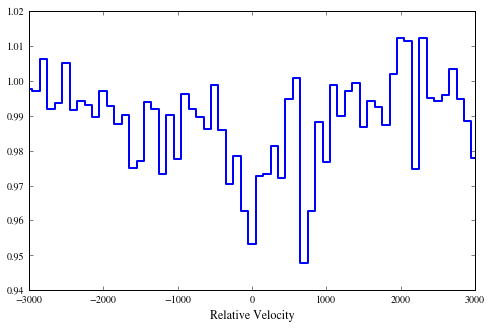

In [5]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Median

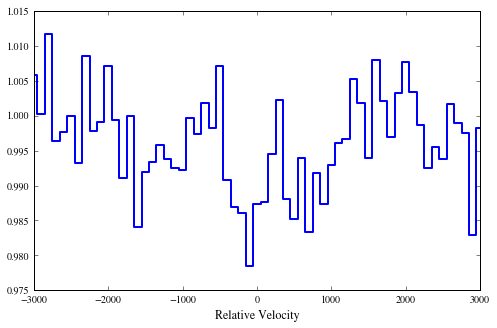

In [6]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Write

In [7]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zIRMgII_2796_z1_mean.fits'
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
outfil = 'Output/QPQ9_zIRMgII_2796_z1_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)

Wrote spectrum to Output/QPQ9_zIRMgII_2796_z1_mean.fits
Wrote spectrum to Output/QPQ9_zIRMgII_2796_z1_med.fits


# Bootstrap

In [8]:
# Mean 
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/IRMgII_2796_z1_mean.fits',stack_tup0=stack_tup)

Equivalent width skewness: Mean=0.244099, Median=0.244667, std=0.237761 for Ntrials=10000
Centroid: Mean = -47.8832, scatter=379.485
Dispersion and scatter of it:  381.431379126 445.686899693
max and min centroid:  4374.00902313 -1488.11795339
Wrote ../Bootstrap/Output/IRMgII_2796_z1_mean.fits


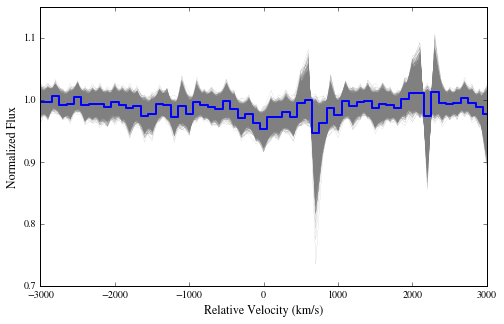

In [9]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_2796_z1_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.9125

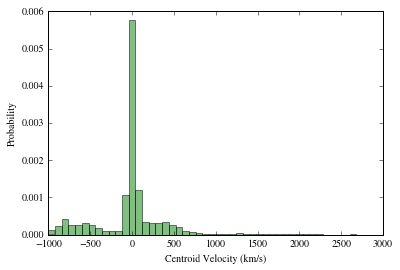

In [10]:
# Plot centroids
tau_cen = hdulist[3].data
n, bins, patches = plt.hist(tau_cen, 50, normed=1, facecolor='green', alpha=0.5, range=(-1000,3000))
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 769./2.)[0])/len(tau_cen)

In [11]:
#Median
qpq9b.boot_trans(wrest=2796.354*u.AA,outfil='../Bootstrap/Output/IRMgII_2796_z1_med.fits',stack_tup0=stack_tup,median=True)

Equivalent width skewness: Mean=0.349485, Median=0.251772, std=3.67619 for Ntrials=10000
Centroid: Mean = 126.164, scatter=596.512
Dispersion and scatter of it:  394.365330586 742.924170973
max and min centroid:  5049.56774471 -2350.75040815
Wrote ../Bootstrap/Output/IRMgII_2796_z1_med.fits


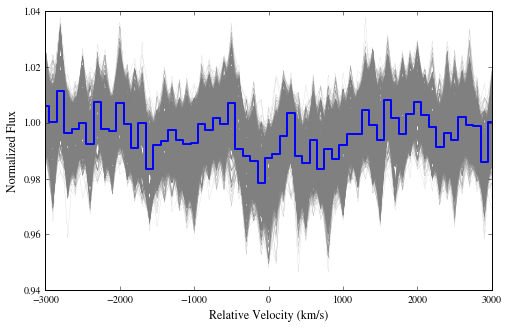

In [12]:
# plot 
stack_tup = (fin_velo, stck_img, stck_msk, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_2796_z1_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# Plot individual spectra

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0003-0022 and wvobs=4248.9 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spSpec-52518-0687-327.fit.gz for BOSSJ0012+0115
S/N in rest frame: 5.80886512225 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6185-56217-0318.fits.gz for BOSSJ0021+1602
S/N in rest frame: 8.50858610136 1 / Angstrom
Database is QPQ
Created on

/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:249: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:957: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)



Loaded spectra
Using spec-4724-55742-0729.fits.gz for BOSSJ1604+2718
S/N in rest frame: 5.96941633785 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ1614+5116 and wvobs=7145.18 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ1618+5143 and wvobs=4245.01 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6313-56460-0348.fits.gz for BOSSJ1622+5124
S/N in re

/Users/lwymarie/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


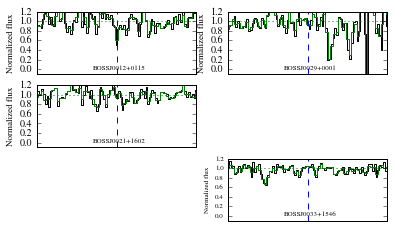

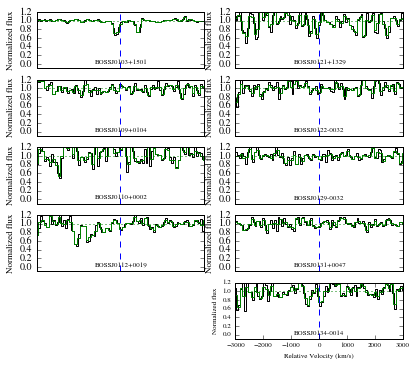

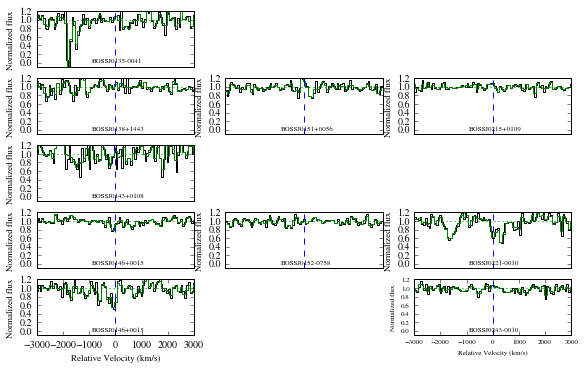

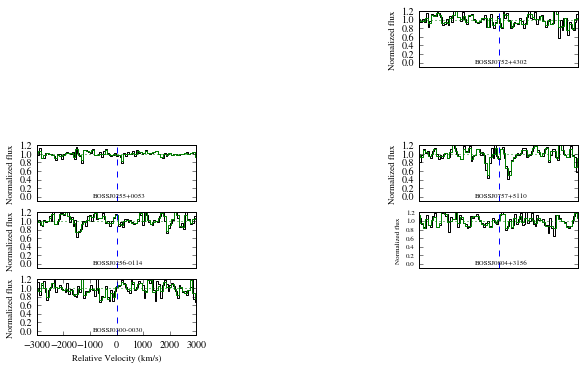

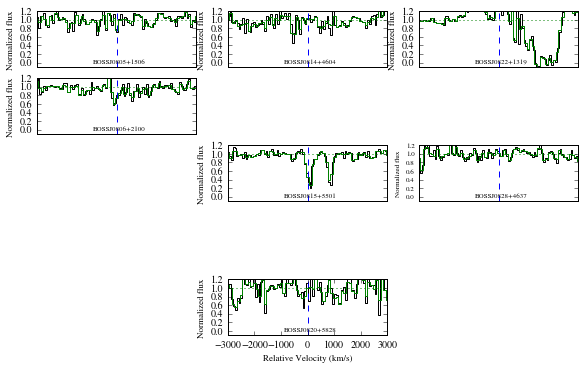

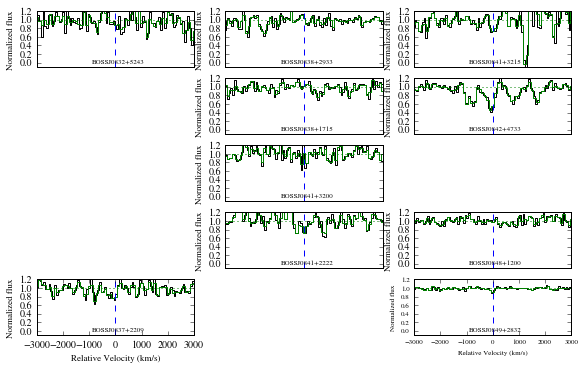

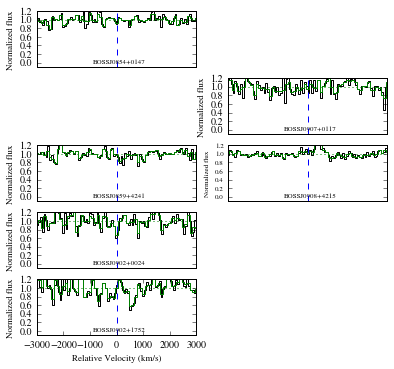

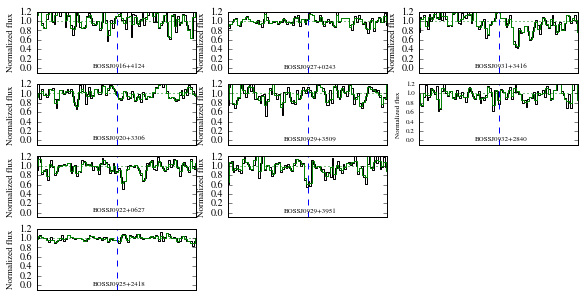

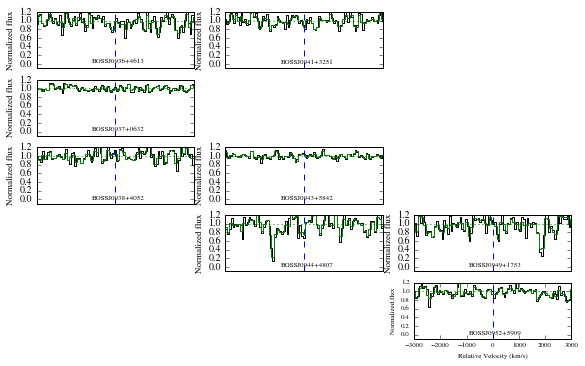

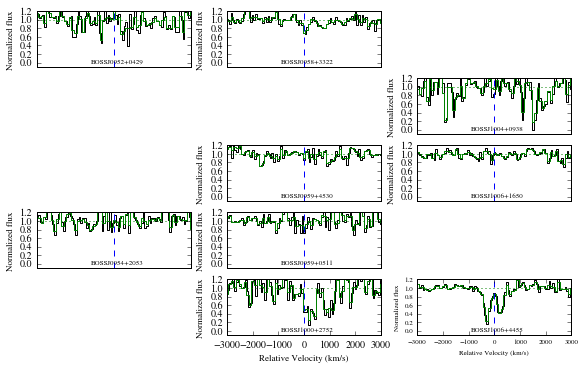

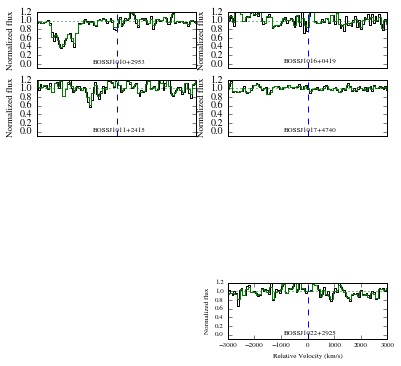

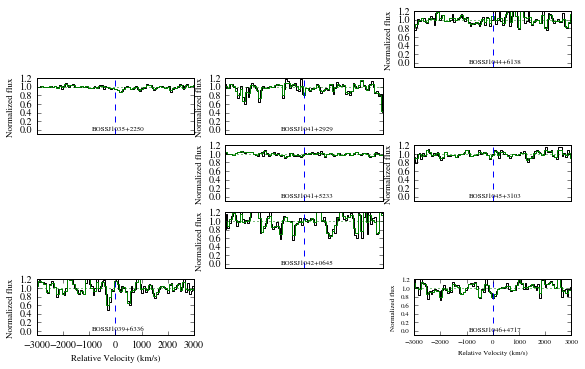

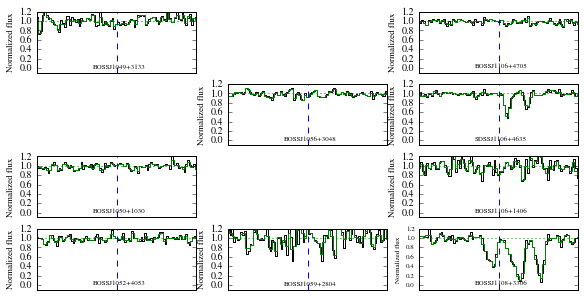

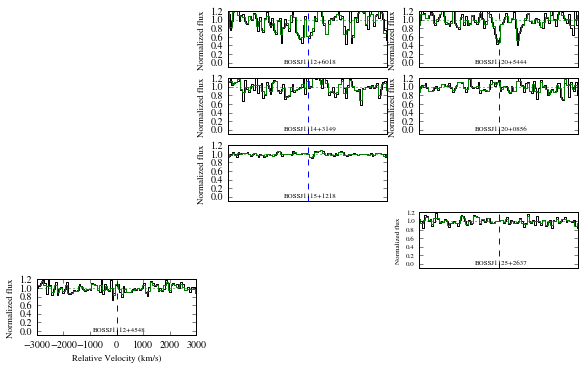

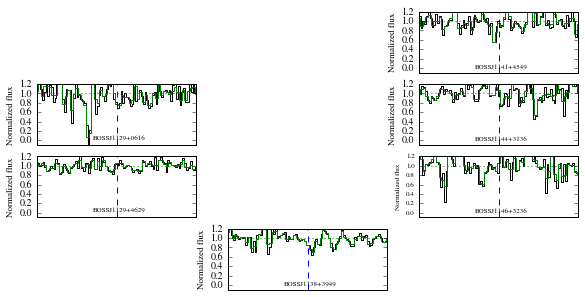

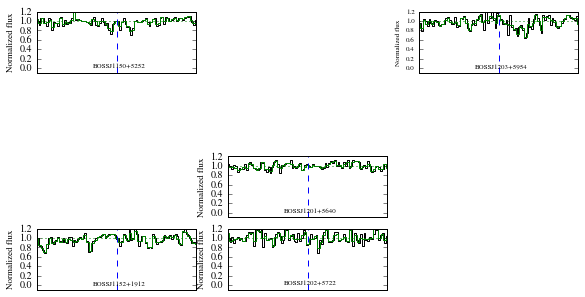

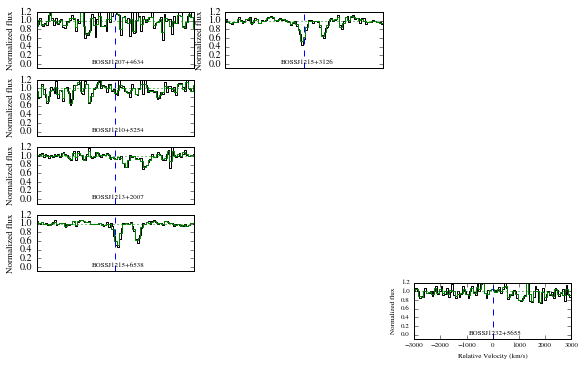

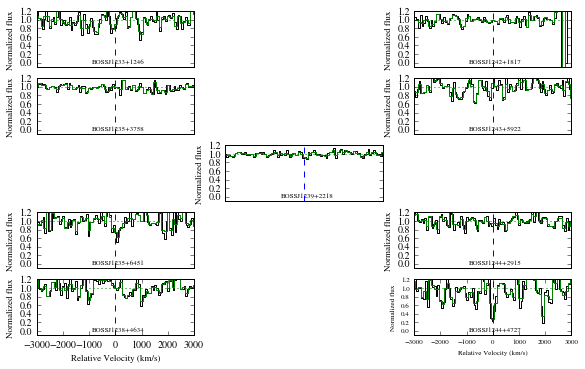

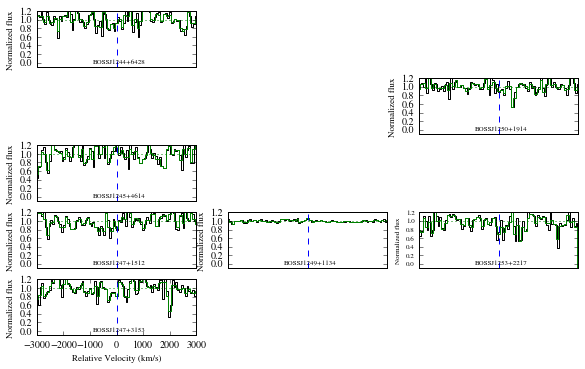

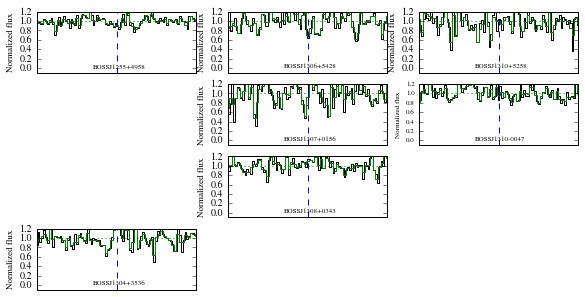

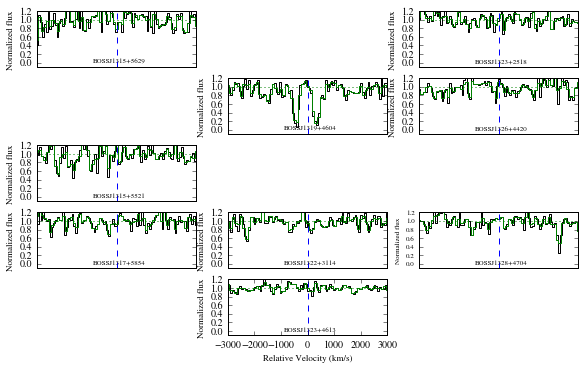

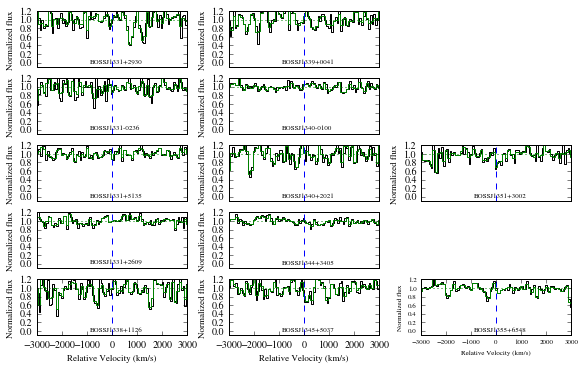

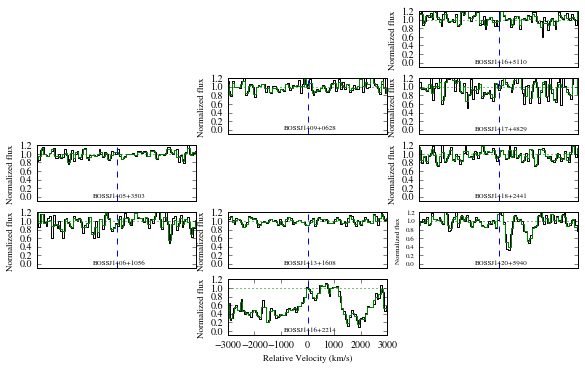

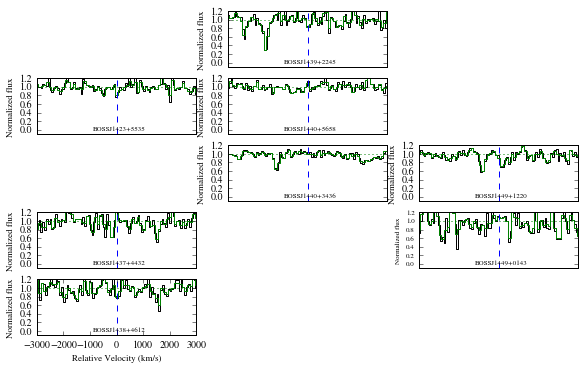

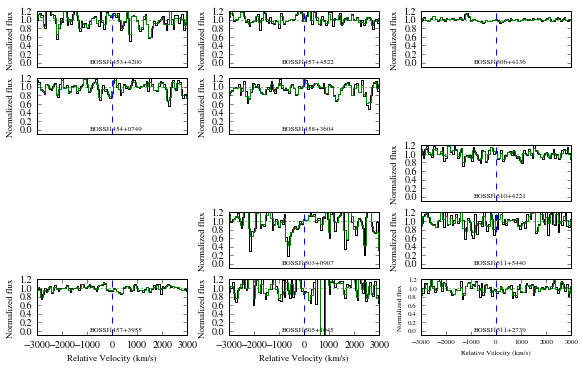

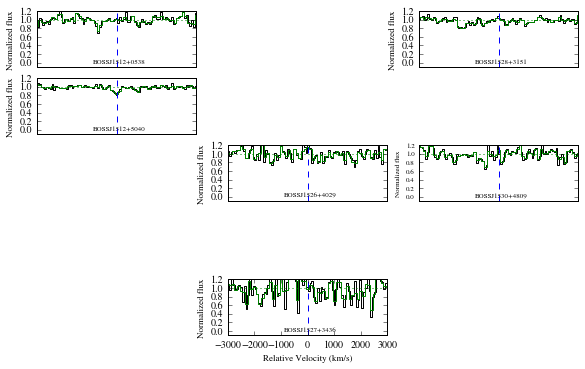

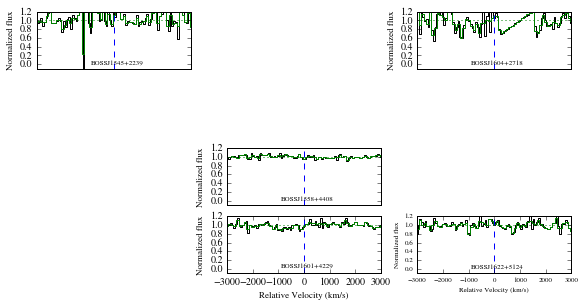

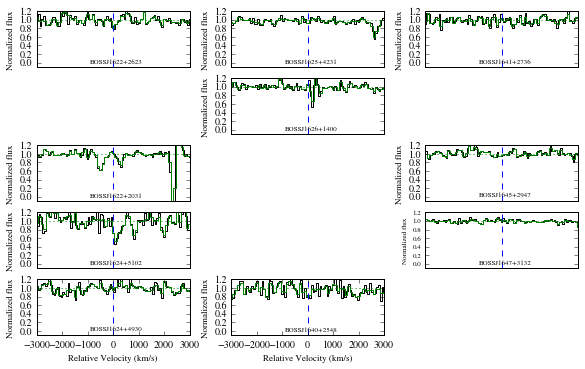

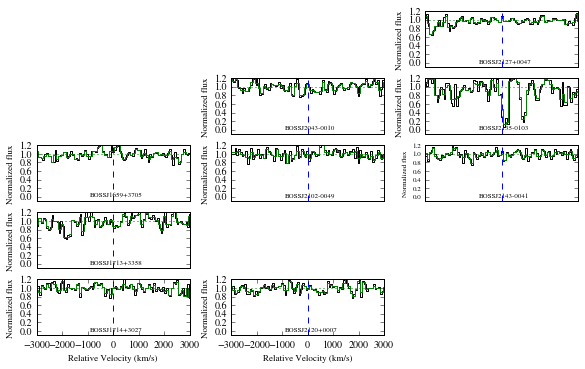

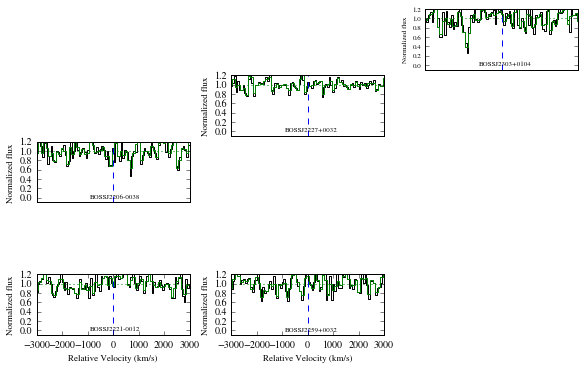

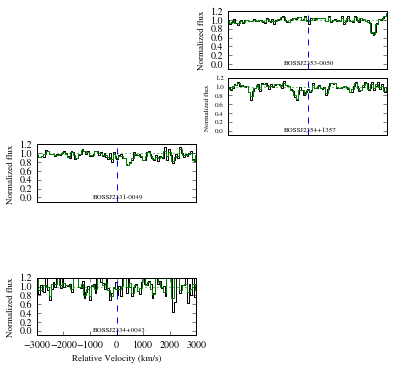

In [2]:
qpq9k.plt_qpq9(wrest=2796.354*u.AA,S2N_cut=5.5/u.AA,stack_fg=False,zfg_mnx=(-9999,1.6),outfil_prefix='plt_qpq_MgII_z1')

# Split in two bins of g_UV

In [11]:
# Load QPQ9 data structure
enigma_path = imp.find_module('enigma')[1]
QPQ9 = xxf.bintab_to_table(enigma_path+'/data/qpq/qpq9_final.fits')
c_QPQ9 = SkyCoord(QPQ9['FG_RA']*u.deg,QPQ9['FG_DEC']*u.deg)
# Find median g_UV
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

x.fits.bintab_to_table: Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits


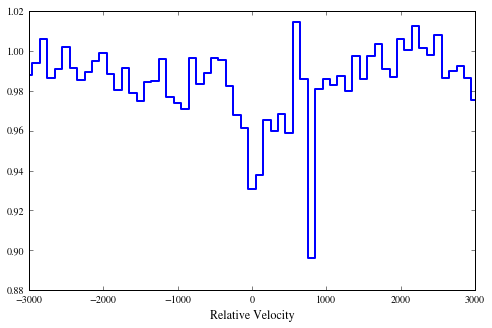

In [12]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

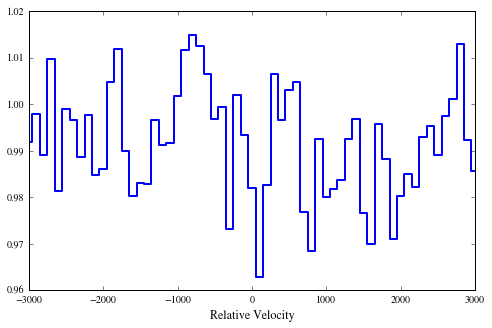

In [13]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)       
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of R_phys

In [13]:
# Find median R_phys
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)
print(med_Rphys,np.min(sv_Rphys),np.max(sv_Rphys))

208.220824248 42.0765759631 299.692821756


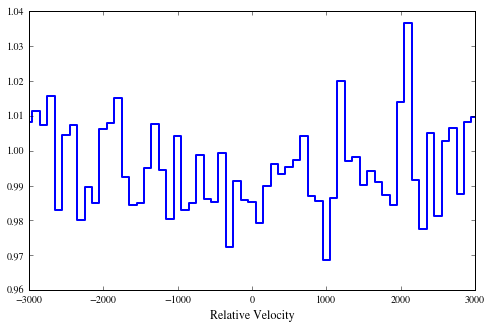

In [14]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

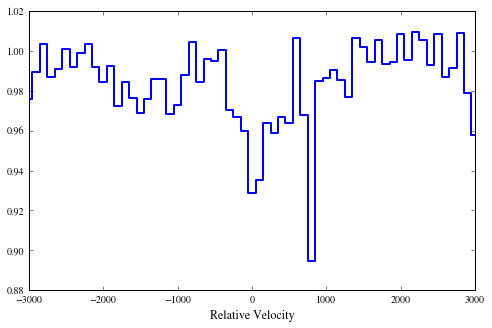

In [15]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in dd['qpq']['NAME']) | ('J0908+4215' in dd['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of velocity separations

In [16]:
# Find median velocity separation 
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
med_dv = np.median(sv_dv)
print(med_dv)

129775.446572


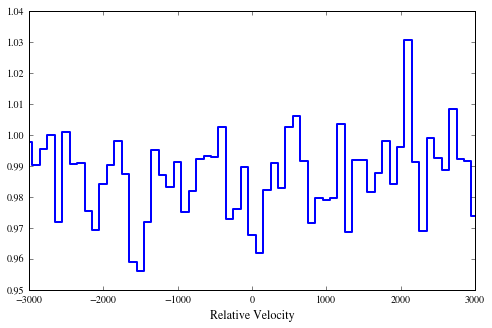

median z_fg = 0.777129024267
median, min, max of R_phys = 218.48204249 51.199507114 299.692821756


In [17]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
sv_Rphys = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
    else:
        sv_z.append(idict['qpq']['Z_FG'])
        c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
        R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
        sv_Rphys.append(R_phys)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg =',np.median(sv_z))
print('median, min, max of R_phys =',np.median(sv_Rphys),np.min(sv_Rphys),np.max(sv_Rphys))

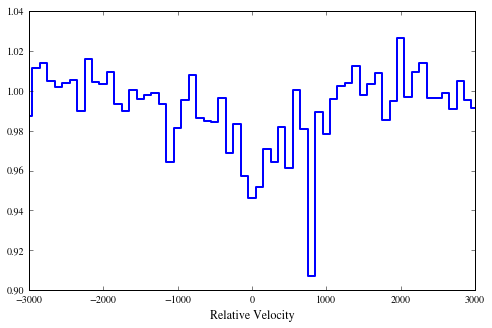

median z_fg = 1.0196210146
median, min, max of R_phys = 201.795699023 42.0765759631 298.33662174


In [18]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
sv_dv = []
sv_Rphys = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in dd['qpq']['NAME']) | ('J0908+4215' in dd['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if dv >= med_dv:
        idx_mask.append(ii)
    else:
        sv_z.append(idict['qpq']['Z_FG'])
        sv_Rphys.append(R_phys)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg =',np.median(sv_z))
print('median, min, max of R_phys =',np.median(sv_Rphys),np.min(sv_Rphys),np.max(R_phys))

## Split in two bins of z_fg

In [19]:
# Find median velocity separation 
for idict in all_dict:
    if idict == None:
        continue
    sv_z.append(idict['qpq']['Z_FG'])
med_z = np.median(sv_z)
print(med_z,np.min(sv_z),np.max(sv_z))

0.944649994373 0.401719987392 1.59189498425


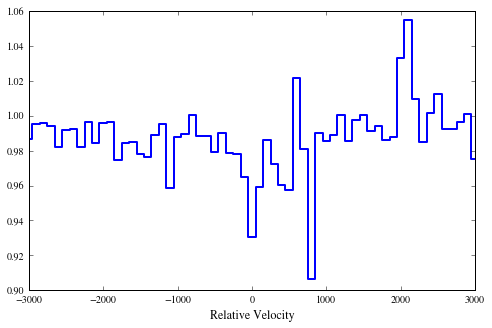

median z_fg = 1.07212603092


In [21]:
# Mask spectra with z_fg below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    if idict['qpq']['Z_FG'] <= med_z:
        idx_mask.append(ii)
    else:
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg =',np.median(sv_z))

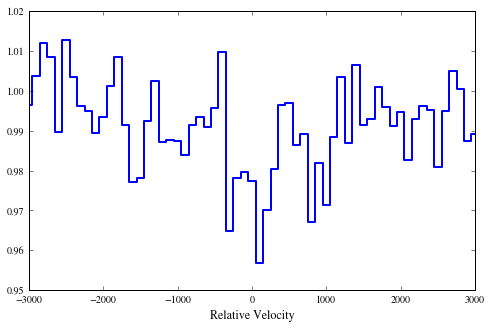

median z_fg = 0.990006029606


In [22]:
# Mask spectra with z_fg above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if ('J0822+1319' in idict['qpq']['NAME']) | ('J0908+4215' in idict['qpq']['NAME']): #BAL, strange emission 
        idx_mask.append(ii)
    if 'J1242+1817' in idict['qpq']['NAME']: # mask sky emission
        stck_mskN[ii,55:61] = 0
    if 'J1622+2031' in idict['qpq']['NAME']: # mask sky emission 
        stck_mskN[ii,53:58] = 0
    if idict['qpq']['Z_FG'] >= med_z:
        idx_mask.append(ii)
    else:
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg =',np.median(sv_z))